<a href="https://colab.research.google.com/github/M0untain13/K4T1-ML/blob/main/lab1/file.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Справочник по категориям TNM.

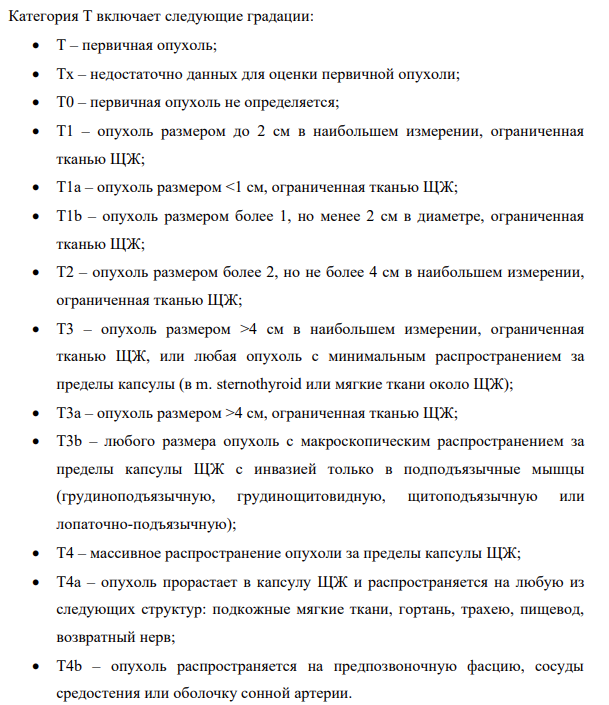

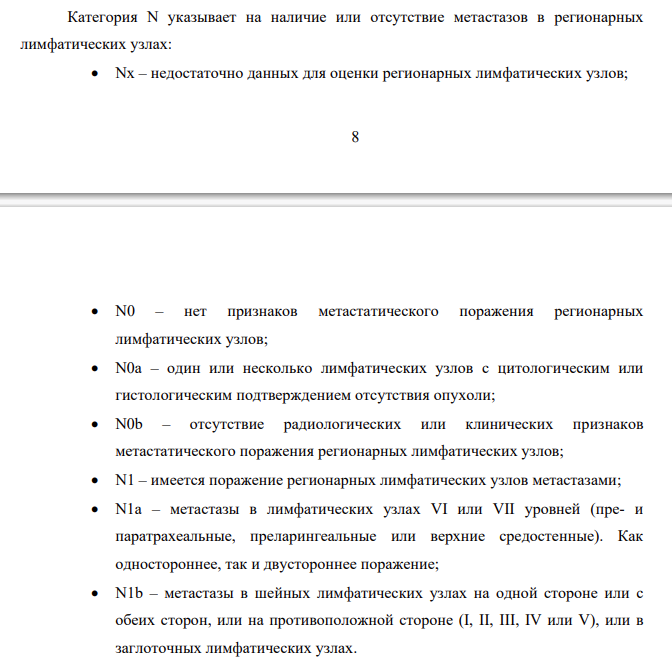

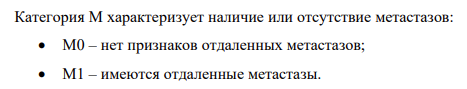

## Исследование данных

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

sns.set()

In [ ]:
%pip install ucimlrepo

In [ ]:
# Получаем датасет "Рецидивы дифференцированного рака щитовидной железы"
from ucimlrepo import fetch_ucirepo

differentiated_thyroid_cancer_recurrence = fetch_ucirepo(id=915)
df = pd.merge(
    differentiated_thyroid_cancer_recurrence.data.features,
    differentiated_thyroid_cancer_recurrence.data.targets,
    how='inner',
    left_index=True, right_index=True
)

In [ ]:
# Инфа о столбцах
print(differentiated_thyroid_cancer_recurrence.variables)

                    name     role         type demographic description units  \
0                    Age  Feature      Integer         Age        None  None   
1                 Gender  Feature  Categorical      Gender        None  None   
2                Smoking  Feature  Categorical        None        None  None   
3             Hx Smoking  Feature  Categorical        None        None  None   
4        Hx Radiothreapy  Feature  Categorical        None        None  None   
5       Thyroid Function  Feature  Categorical        None        None  None   
6   Physical Examination  Feature  Categorical        None        None  None   
7             Adenopathy  Feature  Categorical        None        None  None   
8              Pathology  Feature  Categorical        None        None  None   
9               Focality  Feature  Categorical        None        None  None   
10                  Risk  Feature  Categorical        None        None  None   
11                     T  Feature  Categ

Входные данные:
* **Age** - Возраст
* **Gender** - Пол
* **Smoking** - Курит сейчас?
* **Hx Smoking** - Курил раньше?
* **Hx Radiothreapy** - Была ли лучевая терапия?
* **Thyroid Function** - Функция щитовидной железы
* **Physical Examination** - Результат физического обследования
* **Adenopathy** - Есть ли аденопатия? (Увеличение лимфоузлов)
* **Pathology** - Патология
* **Focality** - Тип очага
* **Risk** - Риск рецедива
* **T, N, M** - Категории (объяснение есть выше)
* **Stage** - Стадия рака
* **Response** - Реакция

Цель:
* **Recurred** - Был ли рецедив? (Yes\No)

In [ ]:
df.head(5)

,Age,Gender,Smoking,Hx Smoking,Hx Radiothreapy,Thyroid Function,Physical Examination,Adenopathy,Pathology,Focality,Risk,T,N,M,Stage,Response,Recurred
0,27,F,No,No,No,Euthyroid,Single nodular goiter-left,No,Micropapillary,Uni-Focal,Low,T1a,N0,M0,I,Indeterminate,No
1,34,F,No,Yes,No,Euthyroid,Multinodular goiter,No,Micropapillary,Uni-Focal,Low,T1a,N0,M0,I,Excellent,No
2,30,F,No,No,No,Euthyroid,Single nodular goiter-right,No,Micropapillary,Uni-Focal,Low,T1a,N0,M0,I,Excellent,No
3,62,F,No,No,No,Euthyroid,Single nodular goiter-right,No,Micropapillary,Uni-Focal,Low,T1a,N0,M0,I,Excellent,No
4,62,F,No,No,No,Euthyroid,Multinodular goiter,No,Micropapillary,Multi-Focal,Low,T1a,N0,M0,I,Excellent,No


In [ ]:
df.describe()

,Age
count,383.000000
mean,40.866841
std,15.134494
min,15.000000
25%,29.000000
50%,37.000000
75%,51.000000
max,82.000000


In [ ]:
df.describe(include=['O'])

,Gender,Smoking,Hx Smoking,Hx Radiothreapy,Thyroid Function,Physical Examination,Adenopathy,Pathology,Focality,Risk,T,N,M,Stage,Response,Recurred
count,383,383,383,383,383,383,383,383,383,383,383,383,383,383,383,383
unique,2,2,2,2,5,5,6,4,2,3,7,3,2,5,4,2
top,F,No,No,No,Euthyroid,Multinodular goiter,No,Papillary,Uni-Focal,Low,T2,N0,M0,I,Excellent,No
freq,312,334,355,376,332,140,277,287,247,249,151,268,365,333,208,275


## Визуализация распределений и взаимосвязей

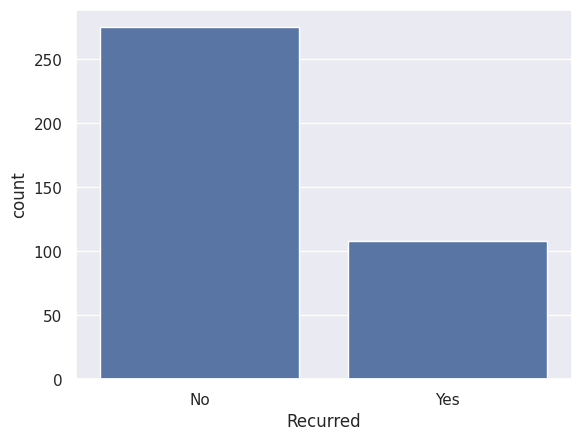

In [ ]:
sns.countplot(x=df["Recurred"]);

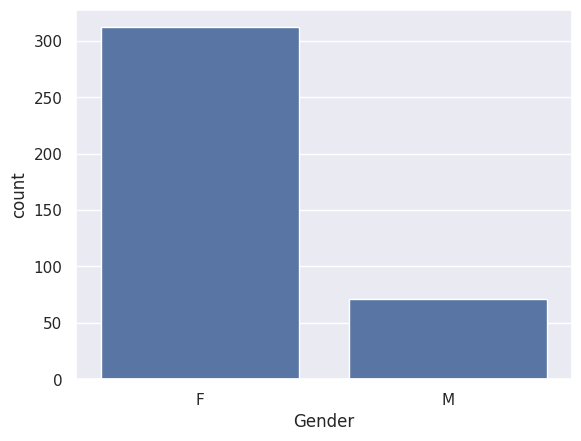

In [ ]:
sns.countplot(x=df["Gender"]);

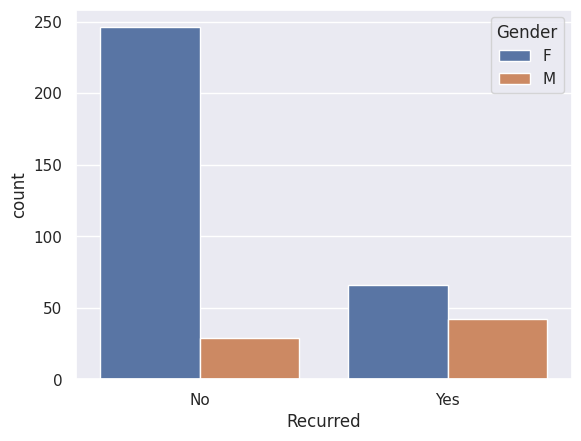

In [ ]:
sns.countplot(data=df, x="Recurred", hue='Gender');

<Axes: xlabel='Age_group', ylabel='count'>

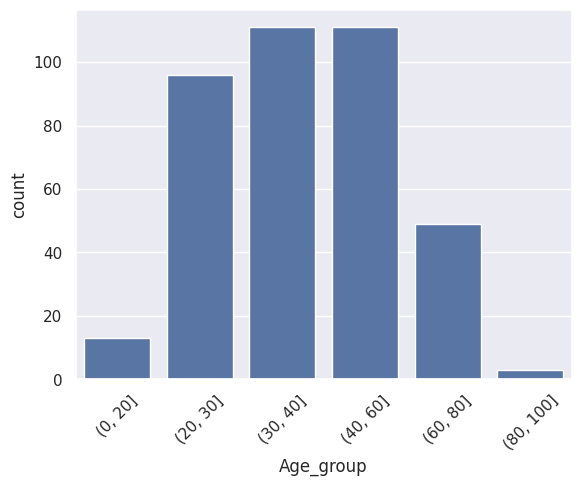

In [ ]:
temp_df = df.copy()
temp_df["Age_group"] = pd.cut(x=temp_df['Age'], bins=[0, 20, 30, 40, 60, 80, 100])
plt.xticks(rotation=45)
sns.countplot(x=temp_df["Age_group"])

<Axes: xlabel='Age_group', ylabel='count'>

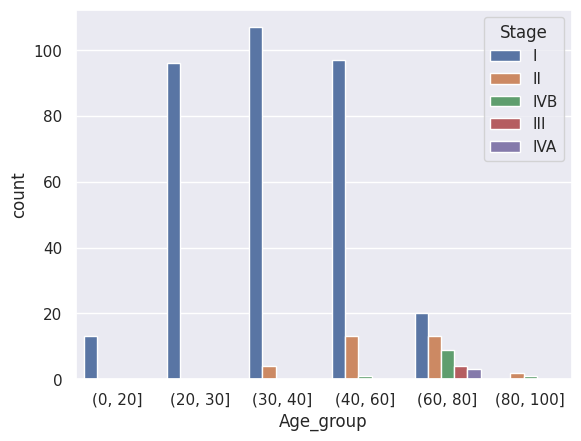

In [ ]:
sns.countplot(data=temp_df, x="Age_group", hue='Stage')

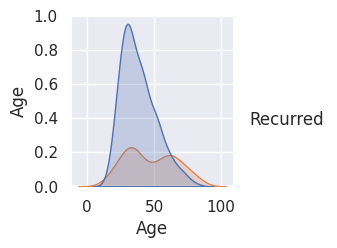

In [ ]:
sns.pairplot(df, kind="scatter", hue="Recurred")

## Нормализация

In [ ]:
df['Age'] = df['Age']  / df['Age'].abs().max()
df.head(5)

,Age,Gender,Smoking,Hx Smoking,Hx Radiothreapy,Thyroid Function,Physical Examination,Adenopathy,Pathology,Focality,Risk,T,N,M,Stage,Response,Recurred
0,0.329268,F,No,No,No,Euthyroid,Single nodular goiter-left,No,Micropapillary,Uni-Focal,Low,T1a,N0,M0,I,Indeterminate,No
1,0.414634,F,No,Yes,No,Euthyroid,Multinodular goiter,No,Micropapillary,Uni-Focal,Low,T1a,N0,M0,I,Excellent,No
2,0.365854,F,No,No,No,Euthyroid,Single nodular goiter-right,No,Micropapillary,Uni-Focal,Low,T1a,N0,M0,I,Excellent,No
3,0.756098,F,No,No,No,Euthyroid,Single nodular goiter-right,No,Micropapillary,Uni-Focal,Low,T1a,N0,M0,I,Excellent,No
4,0.756098,F,No,No,No,Euthyroid,Multinodular goiter,No,Micropapillary,Multi-Focal,Low,T1a,N0,M0,I,Excellent,No


## Кодирование категориальных признаков

In [ ]:
from sklearn.preprocessing import OneHotEncoder

categorical_columns = ["Gender", "Smoking", "Hx Smoking", "Hx Radiothreapy",
                       "Thyroid Function", "Physical Examination", "Adenopathy",
                       "Pathology", "Focality", "Risk", "T", "N", "M", "Stage",
                       "Response", "Recurred"]

categories = {}

encoder = OneHotEncoder()

In [ ]:
for column in categorical_columns:
  res = encoder.fit_transform(df[[column]])
  categories[column] = [str(i) for i in encoder.categories_[0]]
  res = [i for i in res.toarray()]
  df[column] = res

In [ ]:
for category in categories:
  print(f'{category}:')
  print(f'  {", ".join(categories[category])}\n')

Gender:
  F, M

Smoking:
  No, Yes

Hx Smoking:
  No, Yes

Hx Radiothreapy:
  No, Yes

Thyroid Function:
  Clinical Hyperthyroidism, Clinical Hypothyroidism, Euthyroid, Subclinical Hyperthyroidism, Subclinical Hypothyroidism

Physical Examination:
  Diffuse goiter, Multinodular goiter, Normal, Single nodular goiter-left, Single nodular goiter-right

Adenopathy:
  Bilateral, Extensive, Left, No, Posterior, Right

Pathology:
  Follicular, Hurthel cell, Micropapillary, Papillary

Focality:
  Multi-Focal, Uni-Focal

Risk:
  High, Intermediate, Low

T:
  T1a, T1b, T2, T3a, T3b, T4a, T4b

N:
  N0, N1a, N1b

M:
  M0, M1

Stage:
  I, II, III, IVA, IVB

Response:
  Biochemical Incomplete, Excellent, Indeterminate, Structural Incomplete

Recurred:
  No, Yes



In [ ]:
df.head(5)

,Age,Gender,Smoking,Hx Smoking,Hx Radiothreapy,Thyroid Function,Physical Examination,Adenopathy,Pathology,Focality,Risk,T,N,M,Stage,Response,Recurred
0,0.329268,"[1.0, 0.0]","[1.0, 0.0]","[1.0, 0.0]","[1.0, 0.0]","[0.0, 0.0, 1.0, 0.0, 0.0]","[0.0, 0.0, 0.0, 1.0, 0.0]","[0.0, 0.0, 0.0, 1.0, 0.0, 0.0]","[0.0, 0.0, 1.0, 0.0]","[0.0, 1.0]","[0.0, 0.0, 1.0]","[1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]","[1.0, 0.0, 0.0]","[1.0, 0.0]","[1.0, 0.0, 0.0, 0.0, 0.0]","[0.0, 0.0, 1.0, 0.0]","[1.0, 0.0]"
1,0.414634,"[1.0, 0.0]","[1.0, 0.0]","[0.0, 1.0]","[1.0, 0.0]","[0.0, 0.0, 1.0, 0.0, 0.0]","[0.0, 1.0, 0.0, 0.0, 0.0]","[0.0, 0.0, 0.0, 1.0, 0.0, 0.0]","[0.0, 0.0, 1.0, 0.0]","[0.0, 1.0]","[0.0, 0.0, 1.0]","[1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]","[1.0, 0.0, 0.0]","[1.0, 0.0]","[1.0, 0.0, 0.0, 0.0, 0.0]","[0.0, 1.0, 0.0, 0.0]","[1.0, 0.0]"
2,0.365854,"[1.0, 0.0]","[1.0, 0.0]","[1.0, 0.0]","[1.0, 0.0]","[0.0, 0.0, 1.0, 0.0, 0.0]","[0.0, 0.0, 0.0, 0.0, 1.0]","[0.0, 0.0, 0.0, 1.0, 0.0, 0.0]","[0.0, 0.0, 1.0, 0.0]","[0.0, 1.0]","[0.0, 0.0, 1.0]","[1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]","[1.0, 0.0, 0.0]","[1.0, 0.0]","[1.0, 0.0, 0.0, 0.0, 0.0]","[0.0, 1.0, 0.0, 0.0]","[1.0, 0.0]"
3,0.756098,"[1.0, 0.0]","[1.0, 0.0]","[1.0, 0.0]","[1.0, 0.0]","[0.0, 0.0, 1.0, 0.0, 0.0]","[0.0, 0.0, 0.0, 0.0, 1.0]","[0.0, 0.0, 0.0, 1.0, 0.0, 0.0]","[0.0, 0.0, 1.0, 0.0]","[0.0, 1.0]","[0.0, 0.0, 1.0]","[1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]","[1.0, 0.0, 0.0]","[1.0, 0.0]","[1.0, 0.0, 0.0, 0.0, 0.0]","[0.0, 1.0, 0.0, 0.0]","[1.0, 0.0]"
4,0.756098,"[1.0, 0.0]","[1.0, 0.0]","[1.0, 0.0]","[1.0, 0.0]","[0.0, 0.0, 1.0, 0.0, 0.0]","[0.0, 1.0, 0.0, 0.0, 0.0]","[0.0, 0.0, 0.0, 1.0, 0.0, 0.0]","[0.0, 0.0, 1.0, 0.0]","[1.0, 0.0]","[0.0, 0.0, 1.0]","[1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]","[1.0, 0.0, 0.0]","[1.0, 0.0]","[1.0, 0.0, 0.0, 0.0, 0.0]","[0.0, 1.0, 0.0, 0.0]","[1.0, 0.0]"
